# General data exploration

## Let's explore our movie data features

In [1]:
import numpy as np
import pandas as pd

genres = np.load('namesngenre.npy')
df = pd.DataFrame(genres, columns=['name', 'genre'])

df.head()


,name,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4980 entries, 0 to 4979
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4980 non-null   object
 1   genre   4980 non-null   object
dtypes: object(2)
memory usage: 77.9+ KB


In [4]:
df.describe()

,name,genre
count,4980,4980
unique,4980,668
top,Toy Story (1995),Drama
freq,1,554


In [7]:
df["genre"].value_counts()


genre
Drama                          554
Comedy                         487
Drama|Romance                  212
Comedy|Drama                   211
Comedy|Romance                 189
                              ... 
Animation|Comedy|War             1
Adventure|War                    1
Action|Comedy|Romance|War        1
Action|Comedy|Horror|Sci-Fi      1
Action|Comedy|Crime|Horror       1
Name: count, Length: 668, dtype: int64

### Let's see the total number of unique genres in the dataset

In [8]:
# Split the genres and explode the list into separate rows
genres_split = df["genre"].str.split('|').explode()

genre_counts = genres_split.value_counts()

print(genre_counts)
print(genre_counts.shape)


genre
Drama                 2253
Comedy                1916
Thriller               991
Action                 931
Romance                871
Adventure              651
Crime                  606
Horror                 493
Sci-Fi                 476
Fantasy                388
Children               358
Mystery                283
Animation              257
War                    203
Documentary            196
Musical                188
Western                 88
IMAX                    66
Film-Noir               50
(no genres listed)       8
Name: count, dtype: int64
(20,)


<Axes: title={'center': 'Genre Counts'}, xlabel='genre'>

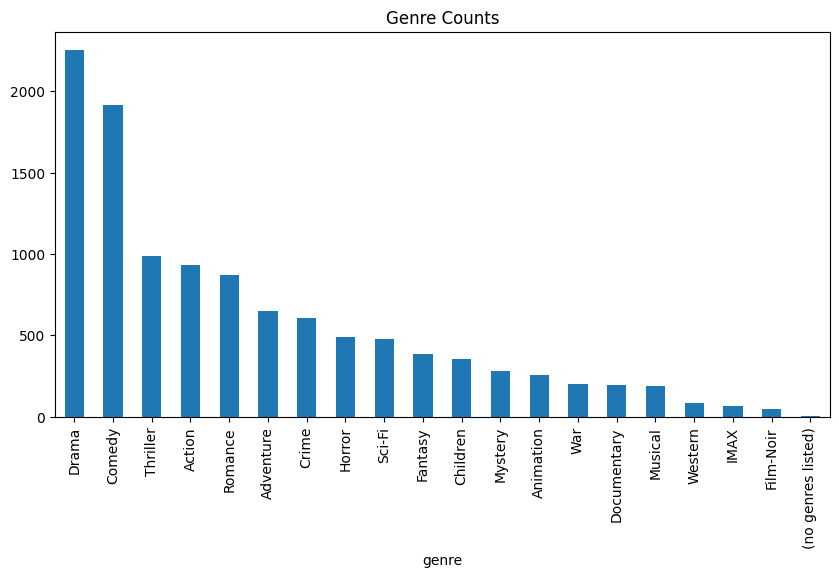

In [9]:
genre_counts.plot(kind='bar', figsize=(10, 5), title='Genre Counts')

In [10]:
train_data = np.load('ratings_train.npy')
train = pd.DataFrame(train_data)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979
0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Columns: 4980 entries, 0 to 4979
dtypes: float64(4980)
memory usage: 23.2 MB


In [12]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979
count,72.000000,37.000000,17.000000,2.000000,17.000000,34.00000,18.000000,2.000000,6.000000,44.000000,...,2.000000,1.0,1.0,2.0,1.0,1.0,2.000000,4.000000,1.0,1.0
mean,3.854167,3.391892,3.029412,2.000000,3.000000,4.00000,2.666667,4.000000,2.916667,3.636364,...,2.750000,3.5,3.0,3.5,3.0,4.5,3.500000,3.750000,3.5,3.0
std,0.815508,0.943804,0.909509,1.414214,0.790569,0.86164,1.014599,1.414214,1.020621,0.659136,...,2.474874,NaN,NaN,0.0,NaN,NaN,0.707107,1.892969,NaN,NaN
min,1.500000,0.500000,1.000000,1.000000,2.000000,2.00000,1.000000,3.000000,1.500000,2.000000,...,1.000000,3.5,3.0,3.5,3.0,4.5,3.000000,1.000000,3.5,3.0
25%,3.000000,3.000000,3.000000,1.500000,3.000000,3.00000,2.000000,3.500000,2.250000,3.000000,...,1.875000,3.5,3.0,3.5,3.0,4.5,3.250000,3.250000,3.5,3.0
50%,4.000000,3.500000,3.000000,2.000000,3.000000,4.00000,3.000000,4.000000,3.000000,3.500000,...,2.750000,3.5,3.0,3.5,3.0,4.5,3.500000,4.500000,3.5,3.0
75%,4.000000,4.000000,3.500000,2.500000,3.000000,5.00000,3.000000,4.500000,3.750000,4.000000,...,3.625000,3.5,3.0,3.5,3.0,4.5,3.750000,5.000000,3.5,3.0
max,5.000000,5.000000,5.000000,3.000000,5.000000,5.00000,4.500000,5.000000,4.000000,5.000000,...,4.500000,3.5,3.0,3.5,3.0,4.5,4.000000,5.000000,3.5,3.0


In [8]:
test_data = np.load('ratings_test.npy')
test = pd.DataFrame(test_data)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979
0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Columns: 4980 entries, 0 to 4979
dtypes: float64(4980)
memory usage: 23.2 MB


In [10]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,4970,4971,4972,4973,4974,4975,4976,4977,4978,4979
count,72.000000,36.000000,18.000000,2.000000,16.000000,34.000000,18.000000,3.0,5.000000,44.000000,...,1.0,1.0,2.00000,1.0,2.000000,1.0,1.0,4.000000,2.000000,1.0
mean,4.055556,3.430556,3.000000,2.500000,2.875000,3.897059,3.416667,3.0,2.700000,3.477273,...,3.5,4.0,2.50000,4.0,3.250000,1.0,4.0,3.875000,3.500000,4.0
std,0.886342,0.926998,1.188177,0.707107,1.147461,0.859699,0.575224,0.0,0.447214,0.848765,...,NaN,NaN,2.12132,NaN,0.353553,NaN,NaN,1.314978,0.707107,NaN
min,2.000000,1.500000,0.500000,2.000000,0.500000,1.000000,2.500000,3.0,2.000000,2.000000,...,3.5,4.0,1.00000,4.0,3.000000,1.0,4.0,2.500000,3.000000,4.0
25%,3.500000,3.000000,3.000000,2.250000,2.000000,3.500000,3.000000,3.0,2.500000,3.000000,...,3.5,4.0,1.75000,4.0,3.125000,1.0,4.0,2.875000,3.250000,4.0
50%,4.000000,3.500000,3.000000,2.500000,3.000000,4.000000,3.000000,3.0,3.000000,3.500000,...,3.5,4.0,2.50000,4.0,3.250000,1.0,4.0,4.000000,3.500000,4.0
75%,5.000000,4.000000,3.875000,2.750000,3.625000,4.500000,4.000000,3.0,3.000000,4.000000,...,3.5,4.0,3.25000,4.0,3.375000,1.0,4.0,5.000000,3.750000,4.0
max,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,4.500000,3.0,3.000000,5.000000,...,3.5,4.0,4.00000,4.0,3.500000,1.0,4.0,5.000000,4.000000,4.0
